In [286]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

Kohenen Network *Course work from CISC452 A3*
Train a neural network consisting of 4 features


In [287]:
data = load_iris()
x = data.data
x = (x - x.mean(axis=0)) / x.std(axis=0)
y = data.target
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [289]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix and accuracy
    # You can only use Numpy here
    cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9=0,0,0,0,0,0,0,0,0
    for yt,yp in zip(y_test,y_pred):
        if yt==0 and yp==0 :
            cell1+=1
        if yt==0 and yp==1:
            cell2+=1
        if yt==0 and yp==2:
            cell3+=1
        if yt==1 and yp==0 :
            cell4+=1
        if yt==1 and yp==1:
            cell5+=1
        if yt==1 and yp==2:
            cell6+=1
        if yt==2 and yp==0 :
            cell7+=1
        if yt==2 and yp==1:
            cell8+=1
        if yt==2 and yp==2:
            cell9+=1
    confusion_matrix=np.array(([cell1,cell2,cell3],[cell4,cell5,cell6],[cell7,cell8,cell9]))
    sum=cell1+cell2+cell3+cell4+cell5+cell6+cell7+cell8+cell9
    Class_0_accuracy=(cell1+cell5+cell6+cell8+cell9)/sum
    Class_1_accuracy=(cell5+cell1+cell7+cell3+cell9)/sum
    Class_2_accuracy=(cell9+cell1+cell2+cell4+cell5)/sum
    #print('The confusion matrix is:')
    #print(confusion_matrix)
    #print('Class 0 accuracy:'+str(Class_0_accuracy))
    #print('Class 1 accuracy:'+str(Class_1_accuracy))
    #print('Class 2 accuracy:'+str(Class_2_accuracy))
    return (Class_0_accuracy+Class_1_accuracy+Class_2_accuracy)/3

    ####################################################################################################

In [290]:
# build a baseline model with K-Means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) #n_clusters - the number of clusters
km.fit(x_train)
y_pred = km.predict(x_train)
evaluator(y_train, y_pred)
y_pred = km.predict(x_test)
evaluator(y_test, y_pred)
# there are often times that the confusion matrix of this model doesn't show correctly
#should be labeling the cluser wrong in some special cases, 
#like the centroid of 0 in this case turns out to be centroid of 1 in the actual value

0.39999999999999997

## Simple Competitive Learning

In [291]:
####################################################################################################
# enter code here to build the Kohonen Network with Maxnet
class Kohonen(object):
    def __init__(self,initial,iteration):
        self.initial=initial #centroids and their coordinate, shape(3,4)
        self.iteration=iteration #integer
        self.history=[]
    def euclidean(self,item1,item2): #first layer to hidden layer activation function
        sum=0
        for i in zip(item1,item2):
          sum+=np.square(i[0]-i[1])
        return np.sqrt(sum)
    #train the initial weights
    def train(self , x,y, learning_rate=0.5):
        num_elements=x.shape[0]
        for j in range(self.iteration):
          #loop over all the elements in x
          d_w=[0.1 for i in range(x.shape[1])]
          for i in range(num_elements):
            #adjustment to the learning rate
            minimal_distance =10000
            for k in range(len(self.initial)):# get the winning node in maxnet
              distance = self.euclidean(self.initial[k],x[i])#first layer calculation
              if distance < minimal_distance:
                minimal_distance = distance
                winning_node_index = k
            winning_node = self.initial[winning_node_index]
            #update weight change
            for a in range(len(d_w)):
              d_w[a] = learning_rate * (x[i][a] - winning_node[a]) 
            # update weights
            self.initial[winning_node_index] = np.add(winning_node, d_w)
          #print("Iteration done:"+str(j+1))
          #print("Centroids: "+str(self.initial))
          acc = (self.predict(x) == y).sum()/num_elements
          self.history.append(acc)
          #print("Accuracy:"+str(acc))
        return self.initial
    def predict(self,x):
        elements_num=x.shape[0]
        y_pred=np.zeros(x.shape[0])
        for i in range(elements_num):
          minimal_distance=10000
          for k in range(len(self.initial)):# get the winning node in maxnet
            distance = self.euclidean(self.initial[k],x[i])#first layer calculation
            if distance < minimal_distance:
              minimal_distance = distance
              winning_node_index = k
              y_pred[i]=k 
        return y_pred
    


####################################################################################################

In [292]:
####################################################################################################
# enter code here to train and test the Kohonen Network
input=[[-1, -0, -1,-1 ],
    [0, 0, 0, 0],
    [0, 0, 1, 2]]
model=Kohonen(input,10)
model.train(x,y)

####################################################################################################

[array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]),
 array([ 0.2127703 , -0.5201684 ,  0.75084178,  0.83154966]),
 array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]

In [293]:
AverageAccuracy=evaluator(model.predict(x),y)

In [294]:
AverageAccuracy

0.8799999999999999

## Principle Component Analysis

In [295]:
####################################################################################################
# enter code here to build the PCA model
class PCA(object):
    def __init__(self,iteration):
      #initialize with some random value
      self.w=np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
      self.iteration=iteration
    def train(self,x,learning_rate=0.0001):
      #normalization
      mean_value=np.mean(x,axis=0)
      normalized_data=x-mean_value
      for iter in range(self.iteration):
        for n in range(normalized_data.shape[0]):
          #initialize y
          y=[0 for h in range(3)]
          #calculate output
          for j in range(3):
            residual=0
            y[j]=np.dot(normalized_data[n],self.w[j])
            for k in range(j):
              residual+=sum(np.dot(y[j],self.w[k]))
            #update weights according to output
            for i in range(len(self.w[0])):
              self.w[j][i] += learning_rate*y[j]*(normalized_data[n][i]-residual)
      return 0
    #trim the data
    def predict(self,x):
      sum_weights=self.w.sum(axis=0)
      max=0
      column_to_be_cut=0
      for i in range(len(sum_weights)):
        if sum_weights[i]>max:
          max=sum_weights[i]
          column_to_be_cut=i
      edited_array=x.copy()
      edited_array=np.delete(edited_array,[i],1)
      print("Cut off column:",column_to_be_cut)
      return edited_array

####################################################################################################

Principal component Analysis network

In [296]:
####################################################################################################
# enter code here to train the PCA model and obtain the new train and test datasets
import time
start_time = time.time()
pca=PCA(50)
pca.train(x)
#gengerate new dataset
x_3=pca.predict(x)
#print('Final weight is:\n', pca.w)
print('PCA time:')
print("--- %s seconds ---" % (time.time() - start_time))
####################################################################################################

Cut off column: 2
PCA time:
--- 0.3638625144958496 seconds ---


Genetic Algorithm for feature reduction

In [297]:
#initialize parameters
import itertools
import random
def initialization(num_feature):
  population=[]
  #Population generation
  for i in range(2,num_feature):
    temp_pop=[]
    for k in range(i):
      temp_pop.append(1)
    while len(temp_pop)<num_feature:
      temp_pop.append(0)
    all_permutation=list(itertools.permutations(temp_pop))
    random.shuffle(all_permutation)
    population.append(all_permutation[0])
    population.append(all_permutation[1])
  #represent each individual in binary
  #forexample,1110 means the first three features are kept and the latter one is reduced
  #return population
  random.shuffle(population)
  return population

In [298]:
#fitnessevaluation function
def fitnessevaluation(binary_feature,input_x,y):
  #binary_feature:individual from population
  #input_x: input data set
  # y: target dataset
  #the default centroid could switch to another value in another classification model
  #for this specific model,there are 2 conditions that require attention
  #the default centroid will be 2*3 column*row if 2 features are reduced
  #will be 3*3 column*row if 1 features is reduced
  
  edit_input=input_x.copy()
  feature_reduced=[i for i, x in enumerate(binary_feature) if x == 0]
  #manually set the centroids
  if len(feature_reduced)==2:
    centroid=[[-1, 0],
    [1, 0],
    [0, 0]]
  else:
    centroid=[[-1, -1, -1 ],
    [1, 0, 0],
    [0, 1, 2]]
  #reduce the feature column
  edited_array=np.delete(edit_input,feature_reduced,1)
  model1=Kohonen(centroid,10)
  model1.train(edited_array,y)
  Average_Accuracy=evaluator(model1.predict(edited_array),y)
  #return average accuracy as fitness evaluation
  return Average_Accuracy

In [299]:
#Multipointer selection
#it is used to make each population get some chance to be selected
def MPS_parent_selection(population,fitness_score):
  #reused code from Assignment1
  parents=[]
  fitness_sum=sum(fitness_score)
  length=len(fitness_score)
  Cumulative=0
  Cumulative_probability_distribution=[]
  for i in range(0,length):
    Cumulative+=fitness_score[i]
    Cumulative_probability_distribution.append(float(Cumulative/fitness_sum))
  #generate multi-pionter selection
  current_number=0
  i=0
  r= random.uniform(0,1/2)
  while(current_number<2):
    while(r<=Cumulative_probability_distribution[i]):
      parents.append(i)
      r+=float(1/2)
      current_number+=1
    i+=1
  #return the number of parents selected from the population
  return parents[0],parents[1]

In [300]:
#select the best 2 parents to mate
def Best_selection(population,fitness_score):
  unsorted=[]
  #combine the individual with its fitness score
  for x,y in zip(population,fitness_score):
    unsorted.append([y,x])
  unsorted.sort(reverse=True)
  parent1=unsorted[0][1]
  parent2=unsorted[1][1]
  return parent1,parent2

In [301]:
#Crossover
def uniform_crossover(p1,p2):
  #randomly generate 2 positions of p1 and exchange with p2
  #
  new_population=[]
  while len(new_population)<4:
    parent_1=list(p1).copy()
    parent_2=list(p2).copy()
    listindex=[0,1,2,3]
    replacement=random.sample(range(0,4),2)
    #generate offspring2
    parent_2[replacement[0]]=parent_1[replacement[0]]
    parent_2[replacement[1]]=parent_1[replacement[1]]
    #generate offspring1
    listindex.remove(replacement[0])
    listindex.remove(replacement[1])
    parent_1[listindex[0]]=parent_2[listindex[0]]
    parent_1[listindex[1]]=parent_2[listindex[1]]
    #I choose not to do a recombination since it could be done by mutation
    new_population.append(parent_1)
    new_population.append(parent_2)
  return new_population

In [302]:
#bit flopping and exchanging mutation
def mutation(p):
  #75% chance for bit flopping
  #25% chance for position swapping
  new_population=[]
  for x in p:
    k=x.copy()
    r=random.randrange(0,4)
    if r:
      position=random.randrange(0,4)
      if k[position]:
        k[position]=0
      else:
        k[position]=1
    else:
      replacement=random.sample(range(0,4),2)
      temp1=k[replacement[0]]
      temp2=k[replacement[1]]
      k[replacement[0]]=temp2
      k[replacement[1]]=temp1
    #check for the final outcome
    #if less than 2 feature selected
    if k.count(1)<2:
      #50% chance to mutate to 2 features, 50% chance to mutate to 3 features
      r=random.randrange(0,2)
      feature_reduced=[a for a, b in enumerate(k) if b == 0]
      while k.count(1)<2+r:
        random.shuffle(feature_reduced)
        k[feature_reduced[0]]=1
        feature_reduced.pop(0)
    #if full selection has occured
    elif k.count(1)>3:
      #50% chance to mutate to 2 features, 50% chance to mutate to 3 features
      r=random.randrange(0,2)
      replacement=random.sample(range(0,4),1+r)
      for n in replacement:
        k[n]=0
    new_population.append(k)
  return new_population

In [303]:
#survivor selection: all offsprings form a new population

In [304]:
#The main program
def genetic(OriginalAccuracy,x_1,y_1):
  optimumAccuracy=0
  selectedAccuracy=-100
  AccuracyHistory=[]
  optimumSelection=[]
  continuous_counter=0
  step=0
  generation=initialization(4)
  MoreAccuracy=[]
  for i in range(len(generation)):
    MoreAccuracy.append(fitnessevaluation(generation[i],x_1,y_1))
  #loop until the optimum Accuracy stabilizes around one value
  while not(OriginalAccuracy-0.01<optimumAccuracy and optimumAccuracy>=selectedAccuracy) or continuous_counter<5:
    step+=1 
    r=random.randrange(0,2)
    #50% for MPS and 50% for best selection
    if r:
      parent1,parent2=MPS_parent_selection(generation,MoreAccuracy)
      parent3=generation[parent1]
      parent4=generation[parent2]
    else:
      parent3,parent4=Best_selection(generation,MoreAccuracy)
    n_p=uniform_crossover(parent3,parent4)
    m_p=mutation(n_p)
    generation=m_p.copy()
    MoreAccuracy=[]
    for i in range(len(generation)):
      MoreAccuracy.append(fitnessevaluation(generation[i],x_1,y_1))
    selectedAccuracy=max(MoreAccuracy)
    selectedindividual=generation[MoreAccuracy.index(selectedAccuracy)]
    if selectedAccuracy>optimumAccuracy:
      optimumAccuracy=selectedAccuracy
      optimumSelection=selectedindividual.copy()
      continuous_counter=0
    else:
      continuous_counter+=1
    AccuracyHistory.append(optimumAccuracy-OriginalAccuracy+0.01)
    #you may enable those options to see the track of training but it may consume more time
    #doesn't matter if you don't mind to add one or two seconds
    #print("Step:", step)
    #print(generation)
    #print(optimumAccuracy)
    #print(selectedAccuracy)
    #print(optimumSelection)
  return optimumSelection,optimumAccuracy,AccuracyHistory,step

In [305]:
start_time = time.time()
result,accuracy,history,steps=genetic(AverageAccuracy,x,y)
print('Genetic algorithm time')
print("--- %s seconds ---" % (time.time() - start_time))

Genetic algorithm time
--- 6.025686264038086 seconds ---


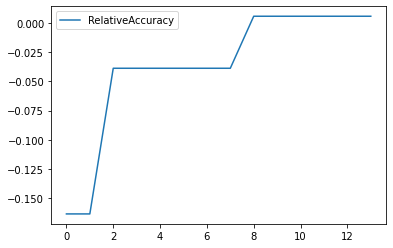

In [306]:
plt.plot(history, label='RelativeAccuracy')
plt.legend()
plt.show()

In [307]:
#using bruteforce for all possible outcomes of feature selection
def bruteforce(num_feature,x_2,y_2):
  all_possiblity=[]
  Optimumfitness=0
  Optimumselection=[]
  for i in range(2,num_feature):
    temp_pop=[]
    for k in range(i):
      temp_pop.append(1)
    while len(temp_pop)<num_feature:
      temp_pop.append(0)
    all_permutation=list(itertools.permutations(temp_pop))
    all_possiblity=all_possiblity+all_permutation
  for item in all_possiblity:
    currentf=fitnessevaluation(item,x_2,y_2)
    if currentf>Optimumfitness:
      Optimumfitness=currentf
      Optimumselection=item.copy()
  return Optimumfitness,Optimumselection

In [308]:
'''
start_time = time.time()
bf_accuracy,bf_result=genetic(4,x,y)
print('Bruteforce time')
print("--- %s seconds ---" % (time.time() - start_time))
#I interrupted the execution of it since it is definitely longer than 6 seconds, it goes for over 4 minutes and non stop
'''

'\nstart_time = time.time()\nbf_accuracy,bf_result=genetic(4,x,y)\nprint(\'Bruteforce time\')\nprint("--- %s seconds ---" % (time.time() - start_time))\n#I interrupted the execution of it since it is definitely longer than 6 seconds, it goes for over 4 minutes and non stop\n'